In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import re
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/gabiuas/Ciencia dos Dados/Projeto 3 Cidados


In [2]:
#Complete
complete = pd.read_csv('CompleteDataset.csv',sep=',')

/Users/gabiuas/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
eu= pd.DataFrame({"Name":complete.Name})

Na célula seguinte nos adicionamos ao nosso Dataframe apenas as variáveis de nosso interesse para a realização do projeto.

In [4]:
eu["Overall"] = complete["Overall"]
eu["Nationality"] = complete["Nationality"]
eu["Club"] = complete["Club"]
eu["Preferred Positions"] = complete["Preferred Positions"]
eu["Long shots"] = complete["Long shots"]
eu["Finishing"] = complete["Finishing"]
eu["Short passing"] = complete["Short passing"]
eu["Ball control"] = complete["Ball control"]
eu["Dribbling"] = complete["Dribbling"]
eu["Long passing"] = complete["Long passing"]
eu["Interceptions"] = complete["Interceptions"]
eu["Marking"] = complete["Marking"]
eu["Standing tackle"] = complete["Standing tackle"]
eu["Sliding tackle"] = complete["Sliding tackle"]
eu["Strength"] = complete["Strength"]
eu["Positioning"] = complete["Volleys"]

In [5]:
eu = eu.fillna(0)  

Na seguinte célula nos pegamos cada um dos stats que nos iriamos usar para compor os grupos de ataque e defesa e transformamos eles de strings (Maneira disposta no Dataset) para numeros, e em seguida colocamos cada um deles em uma lista.

In [6]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]
J=[]
K=[]
L=[]

a=len(eu["Name"])

for e in range(a):
    A.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Long shots"][e]))))
    B.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Finishing"][e]))))
    C.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Short passing"][e]))))
    D.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Ball control"][e]))))
    E.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Dribbling"][e]))))
    F.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Long passing"][e]))))
    G.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Interceptions"][e]))))
    H.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Marking"][e]))))
    I.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Standing tackle"][e]))))
    J.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Sliding tackle"][e]))))
    K.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Strength"][e]))))
    L.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Positioning"][e]))))
    
    
eu["Long shots"] = pd.Series(A)
eu["Finishing"] = pd.Series(B)
eu["Short passing"] = pd.Series(C)
eu["Ball control"] = pd.Series(D)
eu["Dribbling"] = pd.Series(E)
eu["Long passing"] = pd.Series(F)
eu["Interceptions"] = pd.Series(G)
eu["Marking"] = pd.Series(H)
eu["Standing tackle"] = pd.Series(I)
eu["Sliding tackle"] = pd.Series(J)
eu["Strength"] = pd.Series(K)
eu["Positioning"] = pd.Series(L)

Nas próximas células nós fizemos a média ponderada de cada jogador dos stats de ataque e defesa e adicionamos a duas listas diferentes e em seguida integramos ao nosso dataframe.

In [7]:
ataque=[]
for e in range(a):
    ataq=((eu["Long shots"][e]+eu["Finishing"][e]+eu["Short passing"][e]+eu["Ball control"][e]+eu["Dribbling"][e]+eu["Long passing"][e]+eu["Positioning"][e])/7)
    ataque.append(ataq)


In [8]:
defesa=[]
for e in range(a):
    defe=((eu["Interceptions"][e]+eu["Marking"][e]+eu["Standing tackle"][e]+eu["Sliding tackle"][e])/4)
    defesa.append(defe)


In [9]:
eu["ATAQUE"] = pd.Series(ataque)
eu["DEFESA"] = pd.Series(defesa)

Na céulula abaixo, filtramos os dados para que chegassemos a uma lista com apenas os jogadores que atuam no meio de campo.

In [10]:
JoA=[]
JoD=[]

for e in range(a):
    if "RAM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    elif "CAM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    elif "LAM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    elif "RCM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    elif "CM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    elif "LCM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    elif "RM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    elif "LM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    elif "RDM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    elif "CDM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    elif "LDM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
        


In [11]:
from sklearn.cluster import KMeans
from sklearn.cluster import Birch

eu.head()
times=[]
for e in range(a):
    if eu["Club"][e] not in times:
        times.append(eu["Club"][e])
        

Nesta célula nós criamos uma lista para cada jogador com os valores dos stats de ataque e defesa e adicionamos todas elas a uma lista para criarmos uma array.

In [12]:
F=[]
for e in range(len(JoA)):
    f=[]
    f.append(JoD[e])
    f.append(JoA[e])
    
    F.append(f)



X=np.array(F)

Nas próximas células nos definimos o tipo de cluster e definimos seus centros.

In [13]:
km = KMeans(n_clusters=4)

In [14]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
C = km.cluster_centers_
label = km.labels_
colors=['r.','b.','g.','c.']

Na célula abaixo nós separamos quatro jogadores para fazer uma comparação com o resultado dos diferentes grupos do resultado do cluster.

In [16]:
T=[]
L=[392,229,9619,104]
jn=[]
ja=[]
jd=[]
jt=[]
for e in L:
    jn.append(eu["Name"][e])
    jt.append(eu["Club"][e])
    ja.append(eu["ATAQUE"][e])
    jd.append(eu["DEFESA"][e])
    
    
for e in range(len(ja)):
    t=[]
    t.append(jd[e])
    t.append(ja[e])
    T.append(t)

Nesta última célula nós fizemos o gráfico do cluster e plotamos tambem os jogadores para comparação.

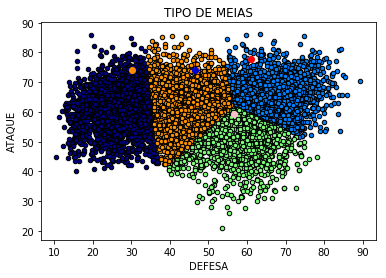

Laranja - M. Rashford (Manchester United) - AM
Azul - R. Sterling (Manchester City) - LM, CM & RM
Rosa - L. Crecco (Lazio) - DM
Vermelho - Koke (Atlético Madrid) - Polivalente


In [18]:
for l in np.unique(label):
    plt.scatter(X[label == l, 0], X[label == l, 1],color=plt.cm.jet(float(l) / np.max(label + 1)),s=20, edgecolor='k')
plt.scatter(T[0][0],T[0][1],c='darkorange')
plt.scatter(T[1][0],T[1][1],c='mediumblue')
plt.scatter(T[2][0],T[2][1],c='pink')
plt.scatter(T[3][0],T[3][1],c='red')
plt.xlabel('DEFESA')
plt.ylabel('ATAQUE')
plt.title('TIPO DE MEIAS')
plt.show()

print('Laranja - {0} ({1}) - AM'.format(jn[0],jt[0]))
print('Azul - {0} ({1}) - LM, CM & RM'.format(jn[1],jt[1]))
print('Rosa - {0} ({1}) - DM'.format(jn[2],jt[2]))
print('Vermelho - {0} ({1}) - Polivalente'.format(jn[3],jt[3]))
